In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_white = pd.read_csv('./winequality-white.csv')
dataset_red = pd.read_csv('./winequality-red.csv')

In [3]:
# dataset_white.iloc[:, :-1].head()
# dataset_white.iloc[:, 11]

column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine_X = dataset_white.iloc[:, :-1].values
white_wine_y = dataset_white.iloc[:, 11].values

In [5]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine_X, white_wine_y, test_size = 0.2, random_state = 42)

In [6]:
print('white_wine_X len', len(white_wine_X))
print('white_wine_y len', len(white_wine_y))
print('white_X_train len',len(white_X_train))
print('white_X_test len',len(white_X_test))
print('white_y_train len',len(white_y_train))
print('white_y_test len',len(white_y_test))
print()
dataset_white.info()

white_wine_X len 4898
white_wine_y len 4898
white_X_train len 3918
white_X_test len 980
white_y_train len 3918
white_y_test len 980

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(white_X_train, white_y_train)

y_pred = regressor.predict(white_X_test)

In [8]:
regressor.coef_

array([ 4.59072370e-02, -1.91488432e+00, -6.13034698e-02,  7.12395507e-02,
       -2.64751329e-02,  5.11945372e-03, -2.42153962e-04, -1.24264125e+02,
        6.00699854e-01,  6.49072780e-01,  2.29008684e-01])

In [9]:
white_X_test_df = pd.DataFrame(white_X_test, columns=column_names[:-1])
white_X_test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000


In [10]:
# white_X_test[:,-1]

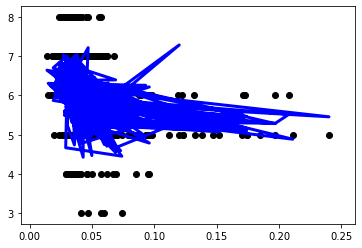

In [11]:
plt.scatter(white_X_test[:,4], white_y_test,  color='black')
plt.plot(white_X_test[:,4], y_pred, color='blue', linewidth=3)

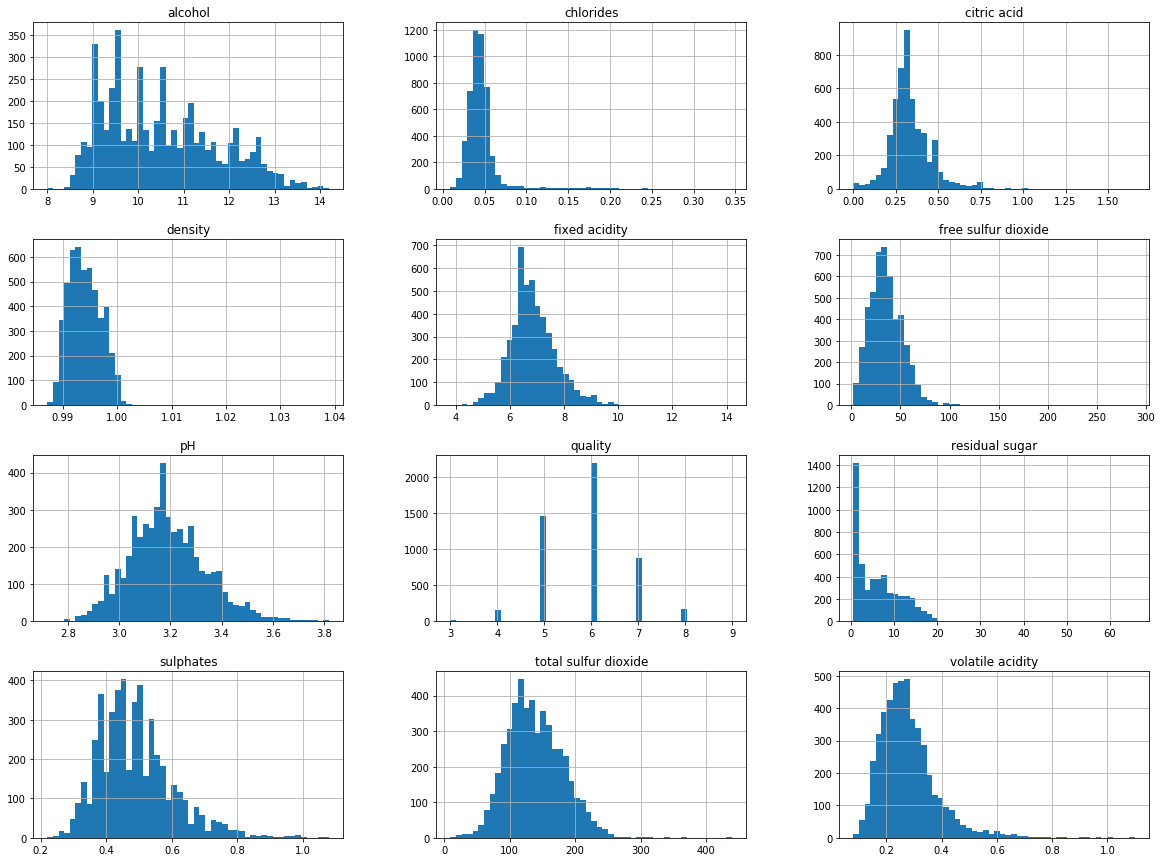

In [12]:
dataset_white.hist(bins=50,figsize=(20,15))
plt.show()

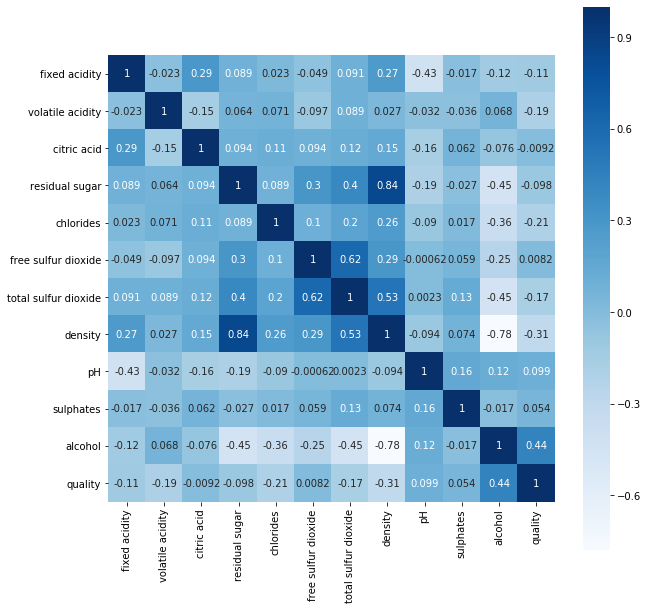

In [13]:
correlation = dataset_white.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')
